# Comparative analysis of the use of AI in finance such as the Portfolio Optimisation Problem

**Author: Dwayne Rosario Fernandes**

This project embarks on an incisive exploration and comparative examination of a broad spectrum of methods encompassing both traditional statistical models like Mean-Variance optimisation and cutting-edge artificial intelligence paradigms, specifically deep learning and reinforcement learning techniques. The end goal is to discover the most effective approach to optimising a portfolio of financial assets, striking an optimal balance between maximising returns and minimising the inherent risk and volatility. In essence, this research seeks to unveil techniques that transform the science of portfolio management into an art, enabling unprecedented returns on investment while mitigating associated risks.


**Notebook Index**

0. Data Collection

1. Equal Weight Investing

2. Minimum Variance Portfolio Using Mean-Variance Optimization (MVO)

3. Maximum Sharpe Ratio Portfolio Using Mean-Variance Optimization (MVO)

4. Probabilistic Approach to Portfolio Optimization Using Monte-Carlo Simulation

5. Cluster-Based Portfolio Optimization Using Hierarchical Risk Parity (HRP)

6. Asset-Weights Allocation Using Long Short-Term Memory (LSTM) Networks

7. Asset-Weights Allocation Using Reinforcement Learning

8. Asset-Weights Allocation Using Auto-Encoders an unsupervised Neural Network approach

9. Performance analysis of the incorporated Allocation strategies

10. Conclusion


In [1]:
# import the necessary python libraries
import pandas as pd
import numpy as np
from datetime import datetime
import yfinance as yf

# Visualisation Libraries
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Utility Scripts
from data_loader import get_closing_prices

**Obtaining the historical stock prices data for stocks in a portfolio**

### 0. Data Collection

In the first step, we concentrate on data collection. This task involves acquiring historical pricing data for a selected portfolio of stocks. For the study, I have chosen the top 10 large-cap stocks based on their market capitalization, which are:

AAPL: Apple Inc., Technology

MSFT: Microsoft Corporation, Technology

AMZN: Amazon.com, Inc., Consumer Discretionary/Technology

GOOG: Google LLC (Alphabet Inc), Communication Services/Technology

META: Meta Platforms Inc., Communication Services/Technology

NVDA: NVIDIA Corporation, Technology

V: Visa Inc., Financials

JNJ: Johnson & Johnson, Health Care

WMT: Walmart Inc., Consumer Staples

PG: Procter & Gamble Co., Consumer Staples

This selection offers us a diverse mix of companies operating across different sectors, thereby giving an extensive spectrum to analyse. I fetch daily closing price data, adjusted for dividends and splits, for a period extending from '2013-01-01' to '2023-08-25'.

I do this by utilising the Yahoo Finance Python library (yfinance) to retrieve historical data due to its ease of use and the extensive range of data it provides.

In [2]:
comparison = {'Allocation Method':[], 'Return %':[], 'Volatility %':[], 'Sharpe Ratio':[], 'Weights':[]}

# Tickers of the Stocks to examine within the portfolio
# tickers = ['META.L','AMZN.L','AAPL', 'GOOG', 'NFLX', 'MSFT', 'TSLA']
# tickers = ['META', 'AMZN', 'AAPL', 'GOOG', 'NFLX', 'MSFT', 'TSLA', 'BP', 'GSK', 'RIO', 'AAL', 'AZN', 'PRU', 'VOD', 'BHP', 'NG', 'WPP']
# tickers = "BP.L SHEL.L SSE.L HSBA.L LLOY.L STAN.L TSCO.L SBRY.L MKS.L GSK.L AZN.L HIK.L SGE.L SCT.L SXS.L RR.L SMIN.L WEIR.L VOD.L BT-A.L ULVR.L DGE.L RKT.L BBY.L COST.L MGNS.L"
# tickers = "SHEL.L ULVR.L HSBA.L BP.L AZN.L GSK.L BATS.L DGE.L RIO.L RKT.L LLOY.L VOD.L"

# Selecting the top-10 large-cap stocks
tickers = "AAPL MSFT AMZN GOOG META NVDA V JNJ WMT PG"
n_stocks = len(tickers.split(" "))

# # Selecting the top-10 mid-cap stocks
# tickers = "TTWO SIX ALK JBLU JACK LYV DISH ZG"

# date range of the stocks
start_date = '2013-01-01'
end_date = '2022-08-25'
todays_date = datetime.today().strftime('%Y-%m-%d')
todays_date = '2023-08-25'
# time_interval = 'daily'
time_interval = '1d'

# Create the data-source object and fetch the stocks data
# df = get_closing_prices(tickers, start_date, todays_date, time_interval)

data = yf.download(tickers, start=start_date, end=todays_date, interval="1d")

# Creating the Dataframe
df2 = data['Adj Close'] # 10 years of historical pricing data
df = df2.loc[:end_date] # 9 years of historical pricing data
print(f'Shape of training data (9 yrs of daily data): {df.shape}')

[*********************100%***********************]  10 of 10 completed
Shape of training data (9 yrs of daily data): (2430, 10)


This code block visualises the historical stock data of all the companies chosen for portfolio optimisation. The x-axis represents time (Date), starting from the start_date and ending at the end_date specified earlier. The y-axis corresponds to the closing price ($) of the stock  for each respective date.

In [3]:
# Visualising the Stocks Data
fig = go.Figure()

# Add traces for each stock
for column in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines', name=column))

# Add a title and labels
fig.update_layout(title='Historical Stock Prices',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Closing Price (GBP)'))

# Display the plot
fig.show()

**Calculating the Daily Returns**

For each stock, I calculate the daily return, which is how much the price has changed compared to the previous day. And the following code block shows a visualisation of the same.

In [4]:
returns = df.pct_change()
returns

AAPL      AMZN      GOOG       JNJ      META      MSFT  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03 -0.012622  0.004547  0.000581 -0.001411 -0.008214 -0.013396   
2013-01-04 -0.027855  0.002592  0.019760  0.011450  0.035650 -0.018715   
2013-01-07 -0.005882  0.035925 -0.004363 -0.002097  0.022949 -0.001870   
2013-01-08  0.002691 -0.007748 -0.001974  0.000140 -0.012237 -0.005246   
...              ...       ...       ...       ...       ...       ...   
2022-08-19 -0.015102 -0.028602 -0.022671  0.015231 -0.038360 -0.013854   
2022-08-22 -0.023029 -0.036244 -0.025821 -0.003508 -0.029233 -0.029355   
2022-08-23 -0.002029  0.003003 -0.002607 -0.008712 -0.011898 -0.004717   
2022-08-24  0.001794  0.001347 -0.000610 -0.003311  0.013345 -0.002351   
2022-08-25  0.014923  0.026009  0.026155  0.009361  0.033811  0.011095   

                NVDA        PG         V       WMT  
Date                                                
2013-01-02       NaN       NaN       NaN       NaN  
2013-01-03  0.000786 -0.006341  0.000772 -0.006354  
2013-01-04  0.032993  0.002030  0.008167  0.003779  
2013-01-07 -0.028897 -0.006803  0.007144 -0.009557  
2013-01-08 -0.021927 -0.001603  0.009310  0.002778  
...              ...       ...       ...       ...  
2022-08-19 -0.049220 -0.000267 -0.011289 -0.014741  
2022-08-22 -0.045661 -0.002671 -0.019782 -0.017880  
2022-08-23  0.008630 -0.019286 -0.008676 -0.004236  
2022-08-24  0.002386 -0.004302 -0.000629  0.007239  
2022-08-25  0.040123 -0.000823  0.015242  0.006668  

[2430 rows x 10 columns]

In [5]:
# Create a figure
fig = go.Figure()

# Add traces for each stock
for column in returns.columns:
    fig.add_trace(go.Scatter(x=returns.index, y=returns[column], mode='lines', name=column))

# Add a title and labels
fig.update_layout(title='Daily Returns of the Portfolio',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Daily Returns'))

# Display the plot
fig.show()


**Displaying the annualised Covariance Matrix**

Covariance is a measure of the directional relationship between two asset returns. It forms the core component for Modern Portfolio Theory (MPT) computations. The covariance matrix is used in the portfolio optimisation process to estimate the variance (and hence, the risk) of a portfolio of assets.

By multiplying the covariance matrix by 252, we are annualising the covariance. The number 252 is used because there are usually 252 trading days in a year for the US markets. 

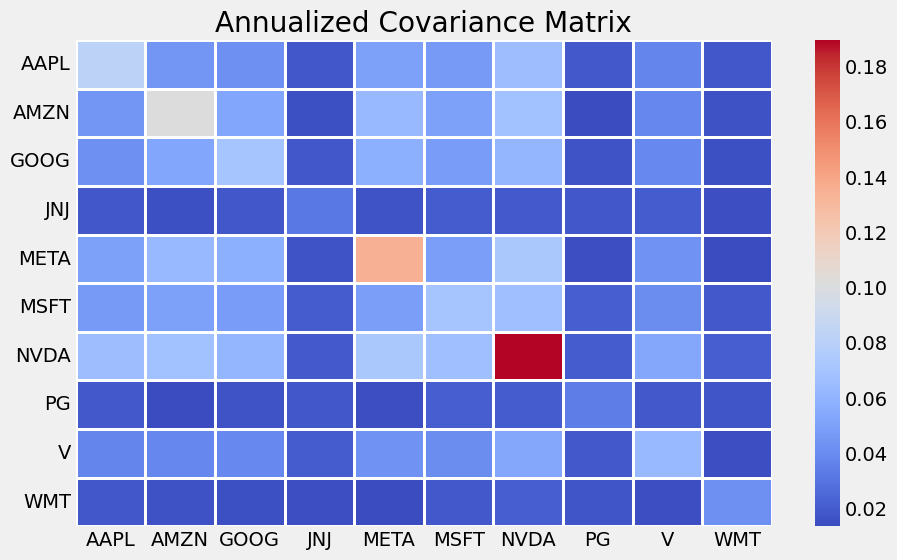

In [6]:
cov_matrix_annual = returns.cov() * 252 #where 252 is the number of business days

# Visualise the Annualised Covariance Matrix
plt.figure(figsize=(10, 6)) # You can adjust the size of your plot

# Creating the heatmap
sns.heatmap(cov_matrix_annual, annot=False, cmap='coolwarm', fmt='.2f', linewidths=2)

plt.title("Annualized Covariance Matrix")
plt.show()

**Calculating the Variance of the Portfolio**

![Formula for Variance of a Portfolio](https://i.stack.imgur.com/U4B9I.png)

### 1. Equal Weight Investing

 Setting up an equal-weighted investment strategy. This is one of the simplest portfolio allocation methods, where you assign an equal proportion of your investment capital to each asset in the portfolio. This method assumes that all stocks have the same potential for return.

In [7]:
# initialising the weights of the assets in the portfolio 
# balanced weights (initially all weighing the same)

equal_weights = np.array([1/n_stocks for t in tickers.split(" ")])
equal_weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [8]:
def plot_asset_allocation(tickers, weights_list, method_name):
    """
    This visualisation code provides an intuitive understanding of the distribution of weights 
    across various stocks in the portfolio according to the chosen allocation strategy.
    """

    # Assume you have your weights in a dictionary
    fig = go.Figure(data=[go.Pie(labels=tickers, 
                                values=weights_list, 
                                hole=.3)])  # To create a donut chart, we use 'hole' argument

    fig.update_layout(
        title_text=f"Asset allocation via {method_name}", 
        # Add annotations in the center of the donut pie
        annotations=[dict(text='Portfolio', x=0.5, y=0.5, font_size=20, showarrow=False)]
    )

    fig.show()

Variance, in the context of portfolio theory, is a measurement of portfolio risk or dispersion. It is a statistic that measures how far a set of numbers (i.e., portfolio returns in this case) are spread out from their average. A high variance indicates that the portfolio's returns can be drastically different, signaling a higher risk. Conversely, a low variance indicates that the returns are less dispersed and hence, the portfolio risk is low.

In [9]:
# Calculating the variance of the equal-weighted Portfolio
port_variance = np.dot(equal_weights.T, np.dot(cov_matrix_annual,equal_weights))
port_variance

0.0383358998091489

**Calculating the Volatility of the Portfolio**

Volatility, in finance, represents the degree of variation of a trading price series over time. It is often used as a measure of risk. In the context of portfolio theory, it's an indication of a portfolio's risk or dispersion from the mean.

It can be done by taking the square root of the portfolio variance

In [10]:
# Calculating the volatility (std dev of the porfolio)
port_volitility = np.sqrt(port_variance)
port_volitility

0.19579555615270972

**Calculating the mean Portfolio Returns**

The portion of your code here calculates the annual portfolio return. This is essentially an estimate of how much the portfolio is expected to return over the course of one year. It's calculated as the weighted average of the expected returns of all the assets in the portfolio.

![Formula for the returns of a portfolio](https://pressbooks.pub/app/uploads/sites/4438/2022/02/work-14.15.png)

In [11]:
# Calculating the annual portfolio return
port_simple_return = np.sum(returns.mean() * equal_weights) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
port_simple_return

0.24597112646593275

**Sharpe Ratio**

The Sharpe Ratio is a measure of risk-adjusted return, which is a way to examine the performance of an investment by adjusting for its risk. It's a useful way to compare the return of one investment with that of another, as it takes into account not just the returns, but also the additional risk taken to achieve those returns.

The formula for the Sharpe Ratio is:

Sharpe Ratio = (Expected portfolio return - Risk-free rate) / Portfolio standard deviation

In [12]:
equal_weights_sr = port_simple_return/port_volitility

**Displaying the Return, Volatility and Variance of the equal-weighting Portfolio**

This block of code provides a visual representation of the asset allocation of your portfolio under the equal-weights strategy, and it prints out some key metrics to assess portfolio performance. These include expected annual return, annual volatility (or risk), annual variance, and the Sharpe Ratio.

In [13]:
plot_asset_allocation(df.columns, equal_weights,"Equal-Weights")
# Displaying the expected return, volatility and variance

print(f'Expected annual return: {port_simple_return*100 :.2f}%')
print(f'Annual volitility or risk: {port_volitility*100 :.2f}%')
print(f'Annual variance: {port_variance*100 :.2f}%')
print(f'Sharpe Ratio: {equal_weights_sr:.2f}%')

# saving in the comparison dictionary for performance analysis
comparison['Allocation Method'].append('Equal Weighting')
comparison['Return %'].append(round(port_simple_return*100,2))
comparison['Volatility %'].append(round(port_volitility*100,2))
comparison['Sharpe Ratio'].append(equal_weights_sr)
comparison['Weights'].append(equal_weights)

Expected annual return: 24.60%
Annual volitility or risk: 19.58%
Annual variance: 3.83%
Sharpe Ratio: 1.26%


### 2. Mean-Variance Optimisation (MVO) for a Minimum Variance Portfolio

Introduced by Harry Markowitz, it's the basis for modern portfolio theory. It aims to create a portfolio that maximizes expected return for a given level of risk or minimizes risk for a given level of expected return.

The EfficientFrontier class in the PyPortfolioOpt library in Python is based on modern portfolio theory (MPT), specifically Markowitz's mean-variance optimisation model. The actual optimisation is done using a convex optimisation solver. PyPortfolioOpt uses the cvxpy library to define and solve the optimisation problem (Max Sharpe Ration). The result of the optimisation is the set of weights that satisfy the objective (max Sharpe Ratio).

In [57]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.cla import CLA

In [58]:
# Optimising the Portfolio for a min-variance Portfolio

# Expected returns
mu = expected_returns.mean_historical_return(df)

# Annalised covariance matrix of asset returns
S = risk_models.sample_cov(df)

# optimising for the minimum risk portfolio
ef = EfficientFrontier(mu, S)
weights = ef.min_volatility()
min_var_weights  = ef.clean_weights() # performs rounding
print(min_var_weights)

plot_asset_allocation(df.columns, list(min_var_weights.values()), "MVO for Min Variance")

min_var_performance = ef.portfolio_performance(verbose = True)

OrderedDict([('AAPL', 0.01213), ('AMZN', 0.04196), ('GOOG', 0.04073), ('JNJ', 0.35536), ('META', 0.01393), ('MSFT', 0.0), ('NVDA', 0.0), ('PG', 0.27013), ('V', 0.02862), ('WMT', 0.23714)])


Expected annual return: 13.0%
Annual volatility: 14.8%
Sharpe Ratio: 0.74


In [59]:
comparison['Allocation Method'].append('MVO for min Variance')
comparison['Return %'].append(round(ef.portfolio_performance()[0]*100,2))
comparison['Volatility %'].append(round(ef.portfolio_performance()[1]*100,2))
comparison['Sharpe Ratio'].append(round(ef.portfolio_performance()[2],2))
comparison['Weights'].append(list(min_var_weights.values()))

### 3. Mean-Variance Optimisation (MVO) for a Maximum Sharpe Ratio Portfolio

In [60]:
# Optimising the portfolio for a Max-sharpe ratio using MPO

ef2 = EfficientFrontier(mu, S)
weights = ef2.max_sharpe()
max_sharpe_weights  = list(ef2.clean_weights().values()) # performs rounding
print(max_sharpe_weights)

plot_asset_allocation(df.columns, list(max_sharpe_weights), "MVO for max Sharpe")

max_sharpe_performance = ef2.portfolio_performance(verbose = True)



comparison['Allocation Method'].append('MVO for max Sharpe')
comparison['Return %'].append(round(max_sharpe_performance[0]*100,2))
comparison['Volatility %'].append(round(max_sharpe_performance[1]*100,2))
comparison['Sharpe Ratio'].append(round(max_sharpe_performance[2],2))
comparison['Weights'].append(max_sharpe_weights)

[0.08725, 0.05604, 0.0, 0.17676, 0.0, 0.29646, 0.38349, 0.0, 0.0, 0.0]


Expected annual return: 35.3%
Annual volatility: 26.2%
Sharpe Ratio: 1.27


**Visualising the Efficient Frontier**

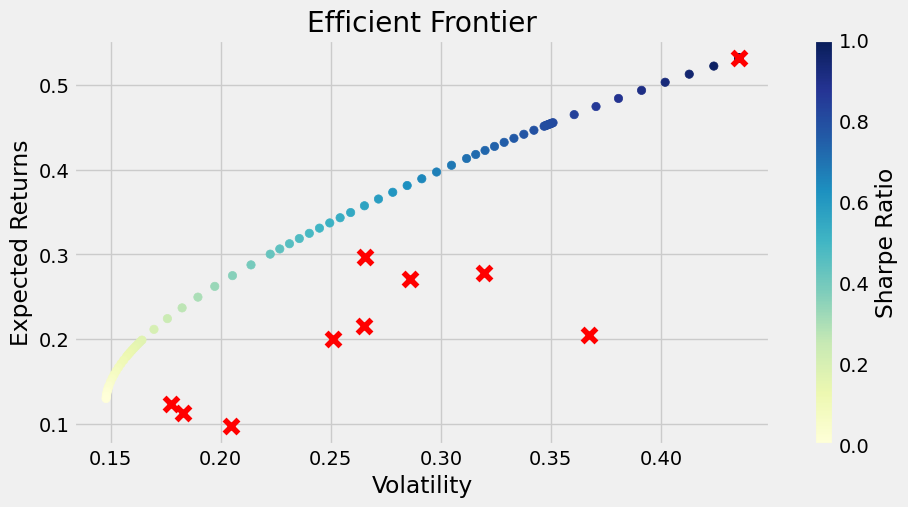

In [61]:
# Get the efficient frontier points
cla = CLA(mu, S)
(ret, vol, _) = cla.efficient_frontier()

# Plot the Efficient Frontier
plt.figure(figsize=(10, 5))
plt.scatter(vol, ret, c=(ret - min(ret))/(max(ret)-min(ret)), cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')

# Optional: plot the individual assets
individual_vol = np.sqrt(np.diag(S))
individual_ret = mu.values
plt.scatter(individual_vol, individual_ret, marker='x', color='red', s=100)

# Show the plot
plt.show()

### 4. Probabilistic Method: Monte Carlo Simulation

A probabilistic method where thousands or millions of random portfolio combinations are tested to identify optimal portfolios.

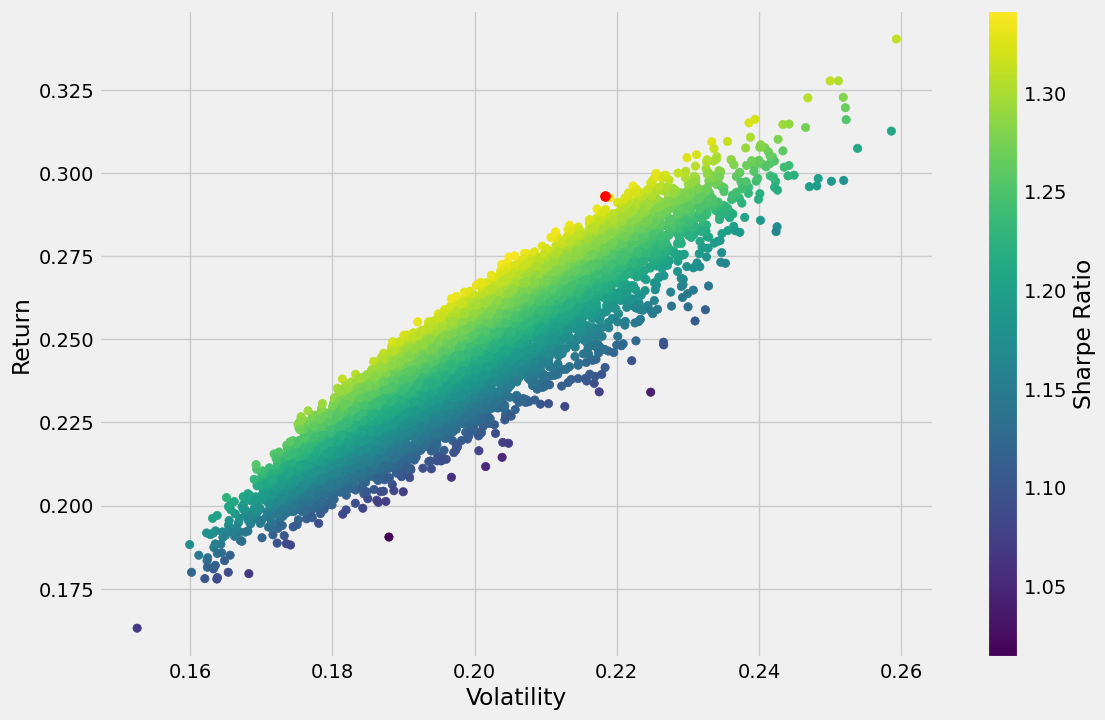

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Assume df is your DataFrame with historical stock prices.

# Calculate daily returns
returns = df.pct_change()

# Number of Portfolios to simulate
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(df.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

# Risk-free rate for Sharpe Ratio, you can adjust this
# risk_free_rate = 0.001
risk_free_rate = 0

for x in range(num_portfolios):

    # Weights
    weights = np.array(np.random.random(len(tickers.split(" "))))
    weights = weights / np.sum(weights)
    
    # Save weights
    all_weights[x, :] = weights

    # Expected return
    ret_arr[x] = np.sum((returns.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = (ret_arr[x] - risk_free_rate) / vol_arr[x]

# Plotting the data with a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Marking the point with the highest Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50)  # Red dot

plt.show()



In [63]:
ms_weights = all_weights[sharpe_arr.argmax()] # monte-carlo simulation to select weights with the highest SR

plot_asset_allocation(df.columns, ms_weights, "Monte-Carlo Simulation")

# Print weights for the portfolio with the highest Sharpe Ratio
print(f'Expected annual return: {max_sr_ret*100 :.2f}%')
print(f'Annual volitility or risk: {max_sr_vol*100 :.2f}%')
print(f"Max Sharpe Ratio is {sharpe_arr.max()}")
print(f"Optimal weights are {ms_weights}")

Expected annual return: 29.30%
Annual volitility or risk: 21.83%
Max Sharpe Ratio is 1.3421199736659695
Optimal weights are [0.07550067 0.05892862 0.03055616 0.11107154 0.02443484 0.18351047
 0.26595408 0.2115789  0.03272993 0.00573479]


In [64]:
comparison['Allocation Method'].append('Monte Carlo Simulation')
comparison['Return %'].append(round(max_sr_ret*100,2))
comparison['Volatility %'].append(round(max_sr_vol*100,2))
comparison['Sharpe Ratio'].append(sharpe_arr.max())
comparison['Weights'].append(all_weights[sharpe_arr.argmax()])

### 5. Hierarchical Risk Parity for Portfolio Optimisation

In [65]:
# Import the required libraries
from pypfopt import HRPOpt, risk_models, expected_returns
import pandas as pd

# Calculate the expected returns
returns = expected_returns.returns_from_prices(df)

# Calculate the covariance matrix
cov_matrix = risk_models.sample_cov(df)

# Create an instance of the HRPOpt class
hrp = HRPOpt(returns)

# Compute the weights
weights = hrp.optimize()

# Clean the weights, setting any weights whose absolute values are below the cutoff to zero, and rounding the rest.
hrp_weights = list(hrp.clean_weights().values())

# visualise the allocation
plot_asset_allocation(df.columns,hrp_weights , "HRP")
# Get the portfolio performance
hrp_performance = hrp.portfolio_performance(verbose=True)

Expected annual return: 19.7%
Annual volatility: 16.6%
Sharpe Ratio: 1.07


In [66]:
hrp_performance

(0.19747167001614316, 0.1661730150360674, 1.0679933199600635)

/tmp/ipykernel_616657/1810131046.py:7: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



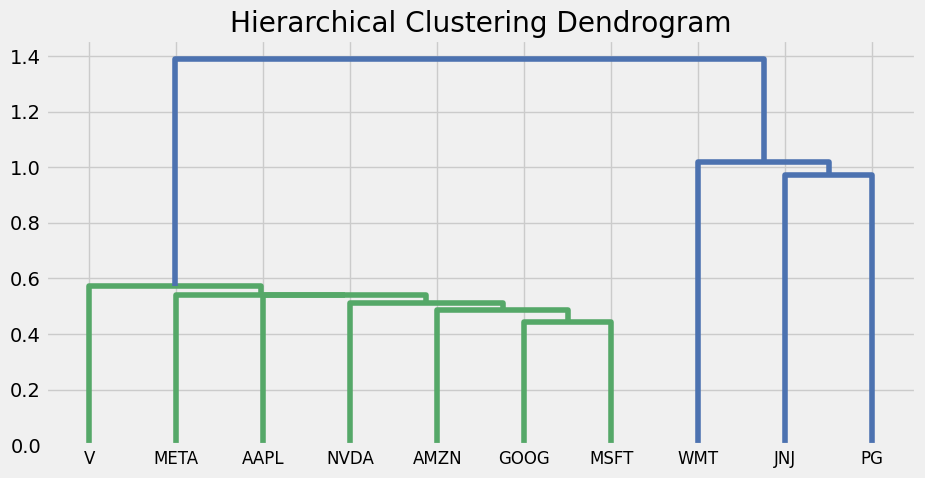

In [67]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Perform hierarchical/agglomerative clustering
corr = cov_matrix.corr()  # Find the correlation matrix 
dist = ((1 - corr) / 2.)**0.5  # Find the distances 
link = sch.linkage(dist, method="single")  # Perform hierarchical/agglomerative clustering

# Plot the dendrogram
plt.figure(figsize=(10, 5))
sch.dendrogram(link, labels=cov_matrix.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()


In [68]:
comparison['Allocation Method'].append('HRP')
comparison['Return %'].append(round(hrp_performance[0]*100))
comparison['Volatility %'].append(round(hrp_performance[1]*100))
comparison['Sharpe Ratio'].append(hrp_performance[2])
comparison['Weights'].append(hrp_weights)

### 6. LSTM for Portfolio Optimisation

In [14]:
from model import WeightSelectorLSTM
import tensorflow as tf
import os
import random

def reset_random_seeds():
   os.environ['PYTHONHASHSEED']=str(1)
   tf.random.set_seed(1)
   np.random.seed(1)
   random.seed(1)

reset_random_seeds()

# to create a model, do: 
model = WeightSelectorLSTM()
# to get the optimized portfolio coefficients, do: 
lstm_weights = model.get_allocations(df)# where df is a DataFrame of closing prices of various assets

2023-07-25 18:52:47.123478: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-25 18:52:47.125404: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 18:52:47.161989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-25 18:52:47.162717: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-25 18:52:47.764398: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: -0.0699
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: -0.0728
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: -0.0747
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: -0.0752
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: -0.0752
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: -0.0754
Epoch 10/10
1/1 [==============================] - 1s 627ms/step


In [17]:
# Calculating the annual portfolio return
port_lstm_return = np.sum(returns.mean() * lstm_weights) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
# Calculating the variance of the Portfolio
port_variance = np.dot(lstm_weights.T, np.dot(cov_matrix_annual,lstm_weights))
port_lstm_volitility = np.sqrt(port_variance)
lstm_sr = port_lstm_return/port_lstm_volitility


# visualise the allocation
plot_asset_allocation(df.columns, lstm_weights, "LSTM")

# Displaying the expected return, volatility and sharpe ratio
print(f'Expected annual return: {port_lstm_return*100 :.2f}%')
print(f'Annual volitility or risk: {port_lstm_volitility*100 :.2f}%')
print(f'Sharpe Ratio: {lstm_sr:.2f}%')


comparison['Allocation Method'].append('LSTM')
comparison['Return %'].append(round(port_lstm_return*100,2))
comparison['Volatility %'].append(round(port_lstm_volitility*100,2))
comparison['Sharpe Ratio'].append(lstm_sr)
comparison['Weights'].append(lstm_weights)

allocation, leftover = invest(df, lstm_weights, 'LSTM')
calc_portfolio_value(df2, allocation, leftover)

Expected annual return: 51.04%
Annual volitility or risk: 42.26%
Sharpe Ratio: 1.21%
Inital amount: £10000
Discrete allocation by LSTM: {'NVDA': 53, 'AMZN': 1, 'MSFT': 1}
Total Expenditure on stocks: £9900.1
Leftover: £99.9
Current Portfolio Value: £24789.48


### 7. Reinforcement Learning for Portfolio Optimisation

In [127]:
import numpy as np
import pandas as pd
import gym
from stable_baselines3 import PPO

# Define the environment
class PortfolioEnv(gym.Env):
    def __init__(self, returns, window_size=10):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.window_size = window_size
        self.current_step = 0
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(returns.shape[1],))
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(window_size, returns.shape[1]))

    def reset(self):
        self.current_step = 0
        return self.returns.iloc[self.current_step: self.current_step + self.window_size].values

    def step(self, action):
        self.current_step += 1
        if self.current_step + self.window_size + 1 > len(self.returns):
            done = True
        else:
            done = False
        action = (action + 1) / 2  # scale to (0, 1)
        weights = action / np.sum(action)
        next_state = self.returns.iloc[self.current_step: self.current_step + self.window_size].values
        returns = np.sum(next_state[-1] * weights)
        reward = returns / np.sqrt(np.dot(weights.T, np.dot(self.returns.cov(), weights))) # Sharpe ratio approximation
        return next_state, reward, done, {}

# Assume you have a DataFrame `df` with historical closing prices for your stocks
# Calculate daily returns
returns = df.pct_change().dropna()

# Create environment
env = PortfolioEnv(returns)

# Create agent
model = PPO("MlpPolicy", env, verbose=1)

# Train agent
model.learn(total_timesteps=20000)

# Example evaluation
obs = env.reset()
for i in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        obs = env.reset()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/drf20/miniconda3/envs/popt/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



-----------------------------
| time/              |      |
|    fps             | 890  |
|    iterations      | 1    |
|    time_elapsed    | 2    |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 2.42e+03     |
|    ep_rew_mean          | 183          |
| time/                   |              |
|    fps                  | 694          |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0070547173 |
|    clip_fraction        | 0.0356       |
|    clip_range           | 0.2          |
|    entropy_loss         | -14.1        |
|    explained_variance   | -0.00231     |
|    learning_rate        | 0.0003       |
|    loss                 | 2.61         |
|    n_updates            | 10           |
|    policy_grad

In [128]:
action

array([-0.32631198, -0.32918414,  0.5050109 ,  1.        ,  1.        ,
        0.40799588,  1.        ,  0.83667374,  0.29768026,  1.        ],
      dtype=float32)

### 8. AutoEncoders for Portfolio Optimisation

In [18]:
# Necessary Libraries
import pandas as pd
import numpy as np
# import yahoofinancials as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Dense, Input
from scipy.optimize import minimize

# # Download Stock Data
# tickers = ['AAPL', 'MSFT', 'GOOG']
# start = '2020-01-01'
# end = '2022-12-31'
# data = yf.download(tickers, start=start, end=end)['Adj Close']

# Data Preprocessing
data = df
returns = data.pct_change().dropna()
scaler = MinMaxScaler()
returns_scaled = scaler.fit_transform(returns)

# Define Autoencoder Architecture
input_layer = Input(shape=(returns_scaled.shape[1],))
encoded = Dense(10, activation='relu')(input_layer)
decoded = Dense(returns_scaled.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

# Compile and Train Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(returns_scaled, returns_scaled, epochs=100, verbose=0)

# Extract Encoded Features
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(returns_scaled)

# Calculate Covariance Matrix and Expected Returns based on Encoded Features
cov_matrix = np.cov(encoded_features.T)
exp_returns = np.mean(encoded_features, axis=0)

# Portfolio Optimization
def objective(weights): 
    return -np.sum(exp_returns*weights) / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(len(tickers.split(" "))))
result = minimize(objective, len(tickers.split(" "))*[1./len(tickers.split(" "))], bounds=bounds, constraints=constraints)

# Print Optimized Portfolio Weights
ae_weights = result.x
print("Optimized Portfolio Weights:", ae_weights)

plot_asset_allocation(df.columns, ae_weights, 'Auto-Encoder')

# comparison['Allocation Method'].append('Auto-Encoder')
# comparison['Return %'].append(round(ef.portfolio_performance()[0]*100,2))
# comparison['Volatility %'].append(round(ef.portfolio_performance()[1]*100,2))
# comparison['Sharpe Ratio'].append(round(ef.portfolio_performance()[2],2))
# comparison['Weights'].append(ae_weights)


76/76 [==============================] - 0s 500us/step
Optimized Portfolio Weights: [0.14382861 0.01528334 0.08773156 0.00242178 0.32591469 0.13752869
 0.13869309 0.01730838 0.06105007 0.0702398 ]


NameError: name 'ef' is not defined

In [26]:
np.mean(returns)

/home/drf20/miniconda3/envs/popt/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3472: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



AAPL    0.001114
AMZN    0.001177
GOOG    0.000911
JNJ     0.000525
META    0.001008
MSFT    0.001171
NVDA    0.002067
PG      0.000490
V       0.000847
WMT     0.000451
dtype: float64

In [38]:
sum(ae_weights * np.mean(exp_returns))

0.4062381684780142

In [41]:
np.sqrt(np.dot(ae_weights.T , np.dot(cov_matrix * 252, ae_weights)))

0.5894840738193665

In [130]:
# from pypfopt import EfficientFrontier
# from pypfopt import risk_models, expected_returns

# # We treat the encoded features as our expected returns
# expected_returns = pd.DataFrame(encoded_features.mean(axis=0)).transpose()

# # Calculate the covariance matrix
# cov_matrix = pd.DataFrame(encoded_features).cov()

# # Create the Efficient Frontier Object
# ef3 = EfficientFrontier(expected_returns.iloc[0], cov_matrix)

# # Maximize the Sharpe ratio, and get the raw weights
# raw_weights = ef3.max_sharpe()

# # Cleaned weights, setting any weights whose absolute values are below the cutoff to zero, and rounding the rest.
# ae_weights = np.array(list(ef.clean_weights().values()))

# plot_asset_allocation(df.columns, ae_weights, 'Auto-Encoder')


# ae_performance = ef3.portfolio_performance(verbose = True)


# comparison['Allocation Method'].append('Auto-Encoder')
# comparison['Return %'].append(round(ef.portfolio_performance()[0]*100,2))
# comparison['Volatility %'].append(round(ef.portfolio_performance()[1]*100,2))
# comparison['Sharpe Ratio'].append(round(ef.portfolio_performance()[2],2))
# comparison['Weights'].append(ae_weights)

In [131]:

port_simple_return = np.sum(returns.mean() * np.array(list(weights.values()))) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
port_simple_return

0.19747169364329462

### 9. Performance Analysis of the incorporated Strategies

In [16]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

def invest(df, weights, method_name):
    total_val = 10000
    latest_prices = get_latest_prices(df)
    weights_ = {df.columns[i]: weights[i] for i in range(len(weights))}
    da = DiscreteAllocation(weights_, latest_prices, total_portfolio_value = total_val)

    allocation, leftover = da.greedy_portfolio()
    print(f'Inital amount: £{total_val}')
    print(f'Discrete allocation by {method_name}: {allocation}')
    total_expenditure = total_val - leftover
    print(f'Total Expenditure on stocks: £{round(total_expenditure,2)}')
    print(f'Leftover: £{round(leftover,2)}')
    return allocation, leftover


def calc_portfolio_value(df, allocation, leftover):
    # Calculate total portfolio value
    new_prices = get_latest_prices(df) # Fetch the new prices
    current_portfolio_value = sum(new_prices[ticker] * num_shares for ticker, num_shares in allocation.items()) + leftover

    print(f'Current Portfolio Value: £{round(current_portfolio_value,2)}')

In [34]:
allocation, leftover = invest(df, equal_weights, 'equal_weights')
calc_portfolio_value(df2, allocation, leftover)

Inital amount: £10000
Discrete allocation by equal_weights: {'ALK': 21, 'DISH': 53, 'JACK': 11, 'JBLU': 119, 'LYV': 10, 'SIX': 38, 'TTWO': 7, 'ZG': 27}
Total Expenditure on stocks: £7733.01
Leftover: £2266.99
Current Portfolio Value: £10055.69


In [40]:
allocation, leftover = invest(df, list(min_var_weights.values()), 'min Var')
calc_portfolio_value(df2, allocation, leftover)

Inital amount: £10000
Discrete allocation by min Var: {'TTWO': 29, 'JACK': 21, 'DISH': 85, 'LYV': 13, 'ALK': 24, 'SIX': 14, 'JBLU': 12, 'ZG': 2}
Total Expenditure on stocks: £9997.78
Leftover: £2.22
Current Portfolio Value: £10024.2


In [41]:
allocation, leftover = invest(df, max_sharpe_weights, 'max Sharpe')
calc_portfolio_value(df2, allocation, leftover)

Inital amount: £10000
Discrete allocation by max Sharpe: {'TTWO': 45, 'LYV': 45}
Total Expenditure on stocks: £9937.35
Leftover: £62.65
Current Portfolio Value: £11316.7


In [42]:
allocation, leftover = invest(df, ms_weights, 'Monte Carlo Simulation')
calc_portfolio_value(df2, allocation, leftover)

NameError: name 'ms_weights' is not defined

In [137]:
allocation, leftover = invest(df, hrp_weights, 'HRP')
calc_portfolio_value(df2, allocation, leftover)

Inital amount: £10000
Discrete allocation by HRP: {'WMT': 14, 'JNJ': 10, 'PG': 11, 'V': 5, 'GOOG': 8, 'MSFT': 4, 'AAPL': 3, 'META': 3, 'AMZN': 3, 'NVDA': 2}
Total Expenditure on stocks: £9953.6
Leftover: £46.4
Current Portfolio Value: £12034.65


In [19]:
allocation, leftover = invest(df, lstm_weights, 'LSTM')
calc_portfolio_value(df2, allocation, leftover)

Inital amount: £10000
Discrete allocation by LSTM: {'NVDA': 53, 'AMZN': 1, 'MSFT': 1}
Total Expenditure on stocks: £9900.09
Leftover: £99.91
Current Portfolio Value: £24894.35


In [19]:
allocation, leftover = invest(df, ae_weights, 'AutoEncoder')
calc_portfolio_value(df2, allocation, leftover)

Inital amount: £10000
Discrete allocation by AutoEncoder: {'META': 19, 'AAPL': 9, 'NVDA': 8, 'MSFT': 5, 'GOOG': 7, 'WMT': 5, 'V': 3, 'PG': 1, 'AMZN': 1}
Total Expenditure on stocks: £9946.06
Leftover: £53.94
Current Portfolio Value: £15469.96


**Displaying the Return, Volatility and Variance of the deep learning based Portfolio**

In [140]:
res = pd.DataFrame(comparison)
res

Allocation Method  Return %  Volatility %  Sharpe Ratio  \
0         Equal Weighting     24.60         19.58      1.256265   
1    MVO for min Variance     12.96         14.80      0.740000   
2      MVO for max Sharpe     35.29         26.19      1.270000   
3  Monte Carlo Simulation     31.30         23.31      1.342695   
4                     HRP     20.00         17.00      1.067994   
5                    LSTM     50.81         41.97      1.210544   
6            Auto-Encoder     12.96         14.80      0.740000   

                                             Weights  
0  [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, ...  
1  [0.01213, 0.04196, 0.04073, 0.35536, 0.01393, ...  
2  [0.08725, 0.05604, 0.0, 0.17676, 0.0, 0.29646,...  
3  [0.12005730770167443, 0.09690210646867137, 0.0...  
4  [0.05334, 0.04276, 0.09901, 0.16482, 0.05309, ...  
5  [0.00021361827, 0.02554354, 5.1210623e-05, 0.0...  
6  [0.14382118260464877, 0.015283466568516183, 0....